In [1]:
from __future__ import division
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
from mpl_toolkits.mplot3d import Axes3D
import json
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.cross_validation import train_test_split
import string
import math
from dota_function_definitions import create_dota_dataframe2

In [2]:
with open('heroes.txt', mode='r') as infile:
    reader = csv.reader(infile)
    heroDict = {rows[0]:rows[1] for rows in reader}

In [3]:
with open('automatchdetails_feb26_to_feb29.txt', 'r') as text:
    dotaString = text.read()

In [4]:
dotaString = string.replace(dotaString, '][', ', ')
matchDetailsJSON = json.loads(dotaString)

In [5]:
dotaFrame = create_dota_dataframe2(matchDetailsJSON)

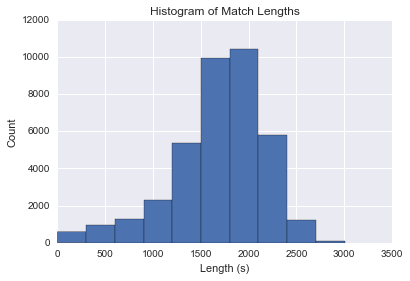

In [6]:
%matplotlib inline
ax = dotaFrame['Match Length (s)'].hist()
ax.set(xlabel='Length (s)', ylabel='Count', title='Histogram of Match Lengths')

In [7]:
dotaFrame = pd.concat([dotaFrame[dotaFrame['Game Mode']==1], dotaFrame[dotaFrame['Game Mode']==22]])
dotaFrame = dotaFrame[dotaFrame['Match Length (s)']>599]

In [8]:
dotaFrame['Radiant']='R'+dotaFrame['Radiant 1'].map(str)+','+'R'+dotaFrame['Radiant 2'].map(str)+','+'R'+dotaFrame['Radiant 3'].map(str)+','+'R'+dotaFrame['Radiant 4'].map(str)+','+'R'+dotaFrame['Radiant 5'].map(str)

In [9]:
dotaFrame['Dire']='D'+dotaFrame['Dire 1'].map(str)+','+'D'+dotaFrame['Dire 2'].map(str)+','+'D'+dotaFrame['Dire 3'].map(str)+','+'D'+dotaFrame['Dire 4'].map(str)+','+'D'+dotaFrame['Dire 5'].map(str)

In [11]:
dotaFrameLogitRadiant = dotaFrame['Radiant'].str.get_dummies(sep=',')

In [12]:
dotaFrameLogitDire = dotaFrame['Dire'].str.get_dummies(sep=',')

In [13]:
dotaFrameLogit = dotaFrameLogitRadiant.join(dotaFrameLogitDire)

In [14]:
dotaFrameLogit['Intercept']=1

In [16]:
dotaFrameLogit['Radiant Win Y/N'] = dotaFrame['Radiant Win Y/N']

In [17]:
dotaFrameLogit.head(10)

,R1,R10,R100,R101,R102,R103,R104,R105,R106,R107,...,D92,D93,D94,D95,D96,D97,D98,D99,Intercept,Radiant Win Y/N
12,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,True
15,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,True
18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
21,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,True
22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,True
24,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,True
26,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False
27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,True
32,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,False


In [18]:
trainColumn = list(dotaFrameLogit.columns.values)[0:-1]

In [19]:
model = sm.Logit(dotaFrameLogit['Radiant Win Y/N'], dotaFrameLogit[trainColumn])

In [20]:
result = model.fit(method='bfgs', maxiter=200)

Optimization terminated successfully.
         Current function value: 0.613280
         Iterations: 113
         Function evaluations: 114
         Gradient evaluations: 114


In [21]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:        Radiant Win Y/N   No. Observations:                31992
Model:                          Logit   Df Residuals:                    31771
Method:                           MLE   Df Model:                          220
Date:                Tue, 01 Mar 2016   Pseudo R-squ.:                  0.1013
Time:                        23:03:15   Log-Likelihood:                -19620.
converged:                       True   LL-Null:                       -21832.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
R1            -0.5794   4.46e+05   -1.3e-06      1.000     -8.74e+05  8.74e+05
R10           -0.3645   4.46e+05  -8.18e-07      1.000     -8.74e+05  8.74e+05
R100           0.0003   4.46e+05    7.2e-10      1.000     -8.74e+05  8.74e+05
R101          -0.0976   4.46e+05  -2.19e-07      1.000     -8.74e+05  8.74e+05
R102           0.8001   4.46e+05   1.79e-06      1.000     -8.74e+05  8.74e+05
R103          -0.1065   4.46e+05  -2.39e-07      1.000     -8.74e+05  8.74e+05
R104          -0.2277   4.46e+05  -5.11e-07      1.000     -8.74e+05  8.74e+05
R105          -0.1343   4.46e+05  -3.01e-07      1.000     -8.74e+05  8.74e+05
R106          -0.3326   4.46e+05  -7.46e-07      1.000     -8.74e+05  8.74e+05
R107           0.1358   4.46e+05   3.05e-07      1.000     -8.74e+05  8.74e+05
R109          -0.2664   4.46e+05  -5.97e-07      1.000     -8.74e+05  8.74e+05
R11           -0.3598   4.46e+05  -8.07e-07      1.000     -8.74e+05  8.74e+05
R110           0.0767   4.46e+05   1.72e-07      1.000     -8.74e+05  8.74e+05
R111          -0.0784   4.46e+05  -1.76e-07      1.000     -8.74e+05  8.74e+05
R112           0.0144   4.46e+05   3.24e-08      1.000     -8.74e+05  8.74e+05
R113          -0.0227   4.46e+05  -5.09e-08      1.000     -8.74e+05  8.74e+05
R12           -0.1341   4.46e+05  -3.01e-07      1.000     -8.74e+05  8.74e+05
R13           -0.2760   4.46e+05  -6.19e-07      1.000     -8.74e+05  8.74e+05
R14            0.2583   4.46e+05   5.79e-07      1.000     -8.74e+05  8.74e+05
R15           -0.2320   4.46e+05   -5.2e-07      1.000     -8.74e+05  8.74e+05
R16            0.0337   4.46e+05   7.55e-08      1.000     -8.74e+05  8.74e+05
R17           -0.7417   4.46e+05  -1.66e-06      1.000     -8.74e+05  8.74e+05
R18            0.0671   4.46e+05    1.5e-07      1.000     -8.74e+05  8.74e+05
R19           -0.3121   4.46e+05     -7e-07      1.000     -8.74e+05  8.74e+05
R2            -0.5097   4.46e+05  -1.14e-06      1.000     -8.74e+05  8.74e+05
R20            0.4276   4.46e+05   9.59e-07      1.000     -8.74e+05  8.74e+05
R21           -0.1784   4.46e+05     -4e-07      1.000     -8.74e+05  8.74e+05
R22            0.4795   4.46e+05   1.08e-06      1.000     -8.74e+05  8.74e+05
R23            0.0531   4.46e+05   1.19e-07      1.000     -8.74e+05  8.74e+05
R25           -0.1389   4.46e+05  -3.12e-07      1.000     -8.74e+05  8.74e+05
R26           -0.0140   4.46e+05  -3.14e-08      1.000     -8.74e+05  8.74e+05
R27            0.3183   4.46e+05   7.14e-07      1.000     -8.74e+05  8.74e+05
R28            0.1175   4.46e+05   2.64e-07      1.000     -8.74e+05  8.74e+05
R29           -0.0117   4.46e+05  -2.62e-08      1.000     -8.74e+05  8.74e+05
R3             0.0698   4.46e+05   1.57e-07      1.000     -8.74e+05  8.74e+05
R30            0.2922   4.46e+05   6.55e-07      1.000     -8.74e+05  8.74e+05
R31            0.2968   4.46e+05   6.66e-07      1.000     -8.74e+05  8.74e+05
R32            0.0239   4.46e+05   5.35e-08      1.000     -8.74e+05  8.74e+05
R3